
Reading data...
     48854 48854 3000 3000
Vectorising...
    Shape of TF-IDF matrix: (48854, 216126)
    Number of features: 216126
    Vocabulary size: 216126
Training...
Training complete.
Running evaluations...
Accuracy: 0.7366666666666667
F1 Score: 0.7261297174766805


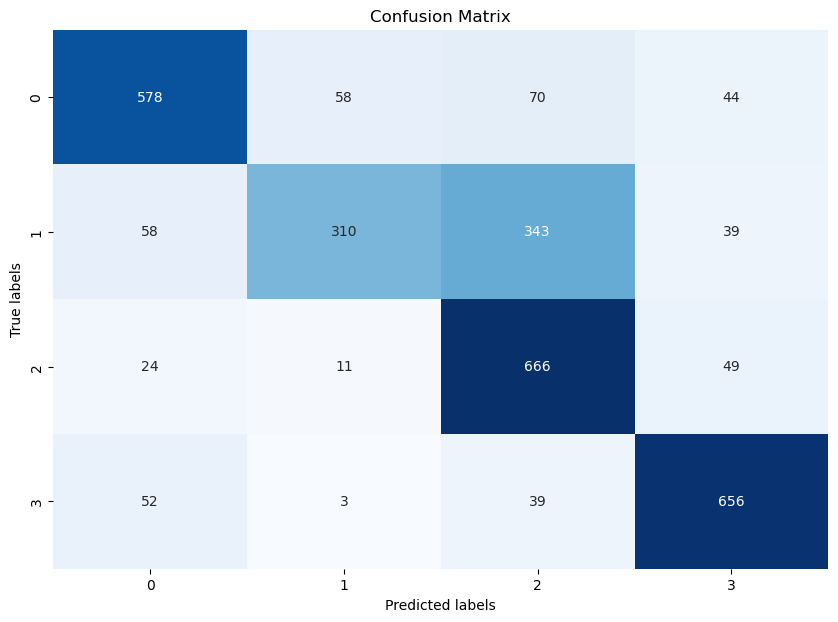

In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
print("\nReading data...")
column_labels = ['label', 'text']
train_df = pd.read_csv('cooperator/data/fulltrain.csv', header=None, names=column_labels)
test__df = pd.read_csv('cooperator/data/balancedtest.csv', header=None, names=column_labels)

# data_df = pd.concat([train_df, test__df], ignore_index=True)
# data_labels_df = data_df["label"]
# data_texts__df = data_df["text"]

# X_train, X_test, y_train, y_test = train_test_split(
#     data_texts__df,
#     data_labels_df,
#     test_size=0.2,
#     random_state=45,
#     stratify=data_labels_df
# )
# train_shape = train_df.shape
# print("    Training Data Shape:", train_shape)
# test_shape = test__df.shape
# print("    Testing Data Shape:", test_shape)

X_train = train_df["text"]
y_train = train_df["label"]
X_test = test__df["text"]
y_test = test__df["label"]

print("    ", len(X_train), len(y_train), len(X_test), len(y_test))

# Vectorise
print("Vectorising...")
token_pattern = r'(?u)\b[A-Za-z][A-Za-z]+\b'
tfidf_vectoriser = TfidfVectorizer(token_pattern=token_pattern, stop_words='english', max_df=0.9)
tfidf_train = tfidf_vectoriser.fit_transform(X_train)
tfidf_test = tfidf_vectoriser.transform(X_test)
# print(tfidf_vectoriser.get_feature_names_out()[:400])
# print(tfidf_train.A[:5])
num_features = len(tfidf_vectoriser.vocabulary_)
print(f'    Shape of TF-IDF matrix: {tfidf_train.shape}')
print(f'    Number of features: {tfidf_train.shape[1]}')
print(f'    Vocabulary size: {num_features}')

# Train model
print("Training...")
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(tfidf_train, y_train)
print("Training complete.")

# Evaluate model
print("Running evaluations...")
predictions = model.predict(tfidf_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
f1 = f1_score(y_test, predictions, average='macro')
print(f'F1 Score: {f1}')
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [4]:
def predict_news(text):
    text_transformed = tfidf_vectoriser.transform([text])
    prediction = model.predict(text_transformed)
    return prediction

In [7]:
user_input = input("Please enter the news text you want to classify: ")
predicted_class = predict_news(user_input)
print(f"The predicted class is: {predicted_class}")

The predicted class is: [3]



Reading data...
     6000 6000 2000 2000
Vectorising...
    Shape of TF-IDF matrix: (6000, 67921)
    Number of features: 67921
    Vocabulary size: 67921
Training...
Training complete.
Running evaluations...
Accuracy: 0.9075
F1 Score: 0.9082494887717123


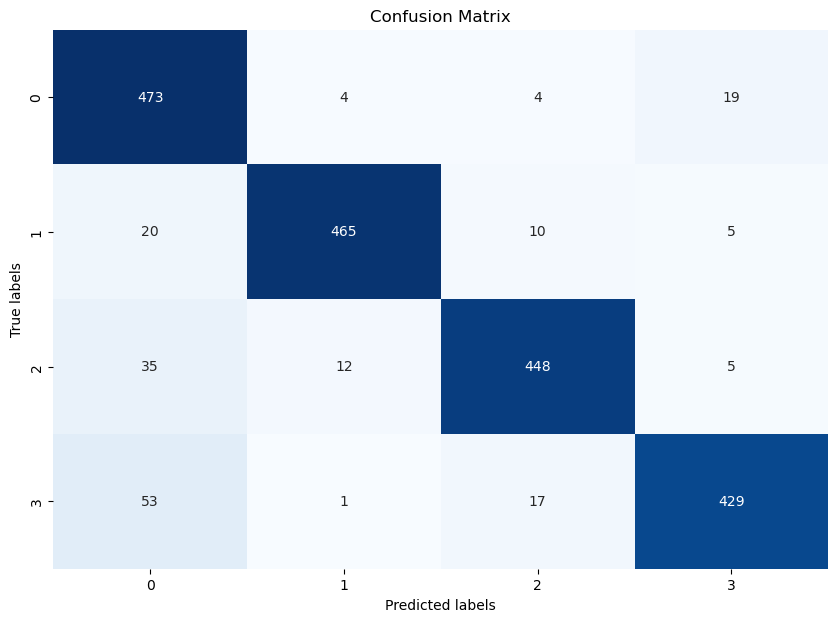

In [11]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
print("\nReading data...")
column_labels = ['label', 'text']
train_df = pd.read_csv('cooperator/data/train.csv', header=None, names=column_labels)
test__df = pd.read_csv('cooperator/data/test.csv', header=None, names=column_labels)

train_df['label'] += 1
test__df['label'] += 1

X_train = train_df["text"]
y_train = train_df["label"]
X_test = test__df["text"]
y_test = test__df["label"]

print("    ", len(X_train), len(y_train), len(X_test), len(y_test))

# Vectorise
print("Vectorising...")
token_pattern = r'(?u)\b[A-Za-z][A-Za-z]+\b'
tfidf_vectoriser = TfidfVectorizer(token_pattern=token_pattern, stop_words='english', max_df=0.9)
tfidf_train = tfidf_vectoriser.fit_transform(X_train)
tfidf_test = tfidf_vectoriser.transform(X_test)
# print(tfidf_vectoriser.get_feature_names_out()[:400])
# print(tfidf_train.A[:5])
num_features = len(tfidf_vectoriser.vocabulary_)
print(f'    Shape of TF-IDF matrix: {tfidf_train.shape}')
print(f'    Number of features: {tfidf_train.shape[1]}')
print(f'    Vocabulary size: {num_features}')

# Train model
print("Training...")
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(tfidf_train, y_train)
print("Training complete.")

# Evaluate model
print("Running evaluations...")
predictions = model.predict(tfidf_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
f1 = f1_score(y_test, predictions, average='macro')
print(f'F1 Score: {f1}')
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()